In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("Logistic_X_Train.csv")
dfy=pd.read_csv("Logistic_Y_Train.csv")
dfz=pd.read_csv("Logistic_X_Test.csv")
x_test=dfz.values
X=dfx.values
Y_train=dfy.values
print(X.shape,Y_train.shape,x_test.shape)

((3000, 3), (3000, 1), (1000, 3))


In [3]:
u=np.mean(X[:,:-1],axis=0)
std=np.std(X[:,:-1],axis=0)
X[:,:-1]=(X[:,:-1]-u)/std
print(X.shape)

(3000, 3)


In [4]:
u=np.mean(x_test[:,:-1],axis=0)
std=np.std(x_test[:,:-1],axis=0)
x_test[:,:-1]=(x_test[:,:1]-u)/std
print(x_test.shape)

(1000, 3)


In [5]:
ones=np.ones((x_test.shape[0],1))
X_test=np.hstack((ones,x_test))
print(X_test.shape)

(1000, 4)


In [6]:
ones=np.ones((X.shape[0],1))
X_train=np.hstack((ones,X))
print(X_train.shape)

(3000, 4)


In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

def error(x,y,theta):
    m=x.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(x[i],theta)
        err+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return err/m
        

In [8]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        #for j in range(X.shape[1]):
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient


In [9]:
def grad_descent(X,Y,learning_rate=0.0078):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(100):
        grad=get_grad(Y,X,theta)
        #for j in range(X.shape[1]):
            #theta[j] = theta[j] + learning_rate*grad[j]
        theta = theta + learning_rate*get_grad(Y,X,theta)    
        e = error(X,Y,theta)
        error_list.append(e)
        
    return theta,error_list
        

In [10]:
theta,error_list=grad_descent(X_train,Y_train)

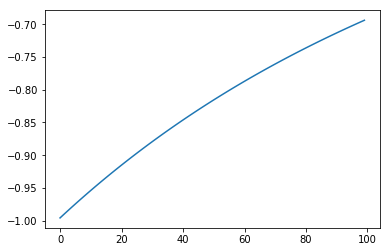

In [11]:
plt.plot(error_list)

In [12]:
print(theta)

[[-0.0014537 ]
 [-0.24826719]
 [ 0.01309167]
 [-0.31918964]]


In [13]:
def predict(xtest,theta):
    prob=hypothesis(xtest,theta)
    if prob>=0.5:
        return 1
    else:
        return 0
        

In [14]:
Y_pred=np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [15]:
print(Y_pred.shape)

(1000,)


In [16]:
np.savetxt?

In [17]:
np.savetxt("logistic_regression.csv",Y_pred,header="label")


In [18]:
#using sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='saga',
                         multi_class='multinomial').fit(X,Y_train)

/home/nitish/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y_pred1=clf.predict(x_test)
print(y_pred1)
np.savetxt("logisticsklearn.csv",y_pred1,header="label")

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 